<a href="https://colab.research.google.com/github/uzma-knpc/ATMmachine/blob/main/NMIreportdiag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Medical Images Diagnosis with Report(Finetune modal)

In [2]:
!pip install -Uq facenet-pytorch
!pip install -Uq pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 11.1.0 which is incompatible.


In [3]:
!pip install -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.10
    Uninstalling google-ai-generativelanguage-0.6.10:
      Successfully uninstalled google-ai-generativelanguage-0.6.10
  Attempting uninstall: google-generativeai
    Found existing installation: google-generativeai 0.8.3
    Uninstalling google-generativeai-0.8.3:
      Successfully uninstalled google-generativeai-0.8.3


In [4]:
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
import google.generativeai as genai
from google.colab import files
import os

In [6]:
import torch
import torch.nn as nn
import torchvision.models as models

import torchvision.transforms as transforms
from PIL import Image

In [7]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# Load the pre-trained InceptionResnetV1 model
model = InceptionResnetV1(pretrained='vggface2').eval()



  0%|          | 0.00/107M [00:00<?, ?B/s]

In [8]:
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1


# Preprocessing function to transform the image into a tensor
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0)



In [9]:
# Function to create image embeddings
def create_image_embedding(image_path):
    try:
        input_tensor = preprocess_image(image_path)
        with torch.no_grad():
            embeddings = model(input_tensor)# ebedding important line
        return embeddings.squeeze().numpy()
    except Exception as e:
        print("Error:", e)
        return None
# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_inception_resnet_v1.pth")


In [ ]:
#!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
# prompt: create python function where we provide image url and imag_name then it save in images folder

import requests
import os

def save_image_from_url(image_url, image_name):
  """
  Downloads an image from a URL and saves it to the 'images' folder.

  Args:
    image_url: The URL of the image to download.
    image_name: The name of the file to save the image as.
  """
  try:
    if not os.path.exists("images"):
      os.makedirs("images")

    image_path = os.path.join("images", image_name)

    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes



In [ ]:
 #chunks
    with open(image_path, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

    print(f"Image saved to: {image_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
  except Exception as e:
    print(f"An error occurred: {e}")


# Images loaded from net

In [ ]:
# Prompt the user to upload a file
uploaded = files.upload()

# Get the file name of the uploaded file
for file_name in uploaded.keys():
    Image_path = file_name # Save the file name (path) into the variable Image_path

print("Image path:", Image_path )

In [ ]:
#save_image_from_url("https://prod-images-static.radiopaedia.org/images/48689902/0c2f5f49d11eb7d8a898cd79a70054_gallery.jpeg", "Nlung.jpg")
#save_image_from_url("https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-1-4614-8654-1_10/MediaObjects/217843_1_En_10_Fig2_HTML.jpg", "Renel.jpg")
#save_image_from_url("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRC9F_G4u8lJJ8O-c00QZp7AdhzPPhNxPDdKA&s","DMSAscan.jpg")
#save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S1930043318306022-gr1.jpg","lungscan.jpg")
#save_image_from_url("https://img.medscapestatic.com/pi/meds/ckb/51/26751tn.jpg","Bonescan.jpg","BS.jpg")
#save_image_from_url("https://ars.els-cdn.com/content/image/1-s2.0-S0001299823000296-gr2.jpg",'Thyroidscan.jpg')
#print("Image saved to:"/Users/uzmailyas/thy.jpeg",image_path)
#save_image_from_url("https://pub.mdpi-res.com/applsci/applsci-12-00698/article_deploy/html/images/applsci-12-00698-g001.png?1642052715","RenelScan.jpg")

Image saved to: images/Renel.jpg


# EMBEDDING

In [12]:
#d = create_image_embedding("./images/DMSAscan.jpg")
m = create_image_embedding(Image_path)
#l = create_image_embedding("./images/lungscan.jpg")
#n = create_image_embedding("./images/Nlung.jpg")
#t = create_image_embedding("./images/Thyroidscan.jpg")
#r = create_image_embedding("./images/RenelScan.jpg")

In [13]:
!pip install -U milvus-lite

!pip install -U pymilvus


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.69.0
    Uninstalling grpcio-1.69.0:
      Successfully uninstalled grpcio-1.69.0


In [23]:
# Paths to your uploaded images and titles
file_paths = [
   # "images/DMSAscan.jpg",
    Image_path,
   # "images/lungscan.jpg",
   # "images/Thyroidscan.jpg",
   # "images/RenelScan.jpg" ,
   # "images/Nlung.jpg" ,  # Replace with actual file paths for each image

]
titles = [
   # "DMSA Scan (ID: 1)",
    file_name,
    #"Lung Scan (ID: 3)",
   # "Thyroid Scan (ID: 4)",
   # "Renal Scan (ID: 5)",
   # "NormalScan (ID: 6)",
]
print(f"namd{Image_path} and title{file_name}")

namdthy (1).jpeg and titlethy (1).jpeg


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime

# Function to load an image and convert it to grayscale
def load_image(file_path):
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    return img_array

In [16]:
# Function to normalize the image intensity
def normalize_image(img):
    img_min, img_max = img.min(), img.max()
    normalized_img = (img - img_min) / (img_max - img_min)
    return normalized_img


In [17]:
# Diagnostic function with criteria
def diagnose_image(img):
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    threshold_mean = 0.5
    threshold_std = 0.1

    # Criteria for diagnosis
    if mean_intensity > threshold_mean and std_intensity > threshold_std:
        return "Abnormal scan detected"
    else:
        return "Scan appears normal"

In [18]:
# Function to calculate image metrics
def calculate_metrics(img):
    return {
        "Mean Intensity": np.mean(img),
        "Standard Deviation": np.std(img),
        "Minimum Intensity": np.min(img),
        "Maximum Intensity": np.max(img)
    }

In [20]:
from PIL import Image

image_path = Image_path
image = Image.open(Image_path )  # Load the image
image
prompt = """This image contains a human organ image  along with some notes and graph
          Given the Medical image, describe the parameters  thoroughly as possible based on what you
          see in the image, "Analyze the given medical image, which includes a human organ along with notes and a graph. Provide a detailed description of the organ, including its features, intensity, and any observed parameters.
          Based on the image, create a simplified renogram and return the results in JSON format.
    patient_details:"\n<Provide patient details>\n",
    Description: "\n<Provide a detailed description of the organ>\n",
    Diagnosis: "\n<Provide a provisional or confirmed diagnosis>\n,
    abnormalities:<Provide a detailed description of the organ>",
    Qauntitattive Measurements:[
      "Organ size",
      "Region of Intrest",
      "Intensity",
      ...
    ]
    Organ Features: [
    "feature1",
    "feature2",
    "feature3",
    "feature4",
    ...
  ]
}
          """

model_gen= genai.GenerativeModel('gemini-1.5-flash')
response_gen= model_gen.generate_content([prompt, image])
#print(response.text)


#print(f"\n Human Prompt:-{prompt}")
#print(f"\nResponse: {response_gen.text}\n")


In [21]:
# Function to generate a medical report
def generate_report(scan_id, scan_name, diagnosis, metrics, doctor_name):
    report = f"""
    ============================================================================
                     NAME OF MEDICAL CENTRE, PAKISTAN
                        (NMI- Artifical Inteligence Image Reader Report)
    ============================================================================
    PRN ID             : {PRN_no}
    Patient Name       : {Patient_name}
    Diagnosis          : {diagnosis}

    Metrics:
    ----------------------------------------------------------------------------
    Mean Intensity     : {metrics["Mean Intensity"]:.4f}
    Standard Deviation : {metrics["Standard Deviation"]:.4f}
    Minimum Intensity  : {metrics["Minimum Intensity"]:.4f}
    Maximum Intensity  : {metrics["Maximum Intensity"]:.4f}

    Analysis:
    ----------------------------------------------------------------------------
    {response_gen.text}



    Report Generated by:
    Doctor             : {doctor_name}
    Date               : {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}
    ============================================================================
                                                          Dr.Bashir Ahmed
                                                    Consultant Nuclear Physician
    """
    return report

In [26]:
def process_and_generate_reports(file_paths, titles, doctor_name):
    reports = []  # Initialize an empty list to store the reports
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (file_path, title) in enumerate(zip(file_paths, titles)):
        if i >= len(axes):
            break

        img = load_image(file_path)
        normalized_img = normalize_image(img)
        diagnosis = diagnose_image(normalized_img)
        metrics = calculate_metrics(normalized_img)
        scan_id = i + 1

        # Append report
        report = generate_report(PRN_no, title, diagnosis, metrics, doctor_name)
        reports.append(report)

        # Display image with diagnosis
        ax = axes[i]
        im = ax.imshow(normalized_img, cmap="gray")
        ax.set_title(f"{title}\n{diagnosis}", fontsize=10)
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Add colorbar
    plt.tight_layout()
    plt.show()

    return reports  # Return the generated reports list


Patient Namegfgtth
PRN665676
Duty Doctorhhjhg


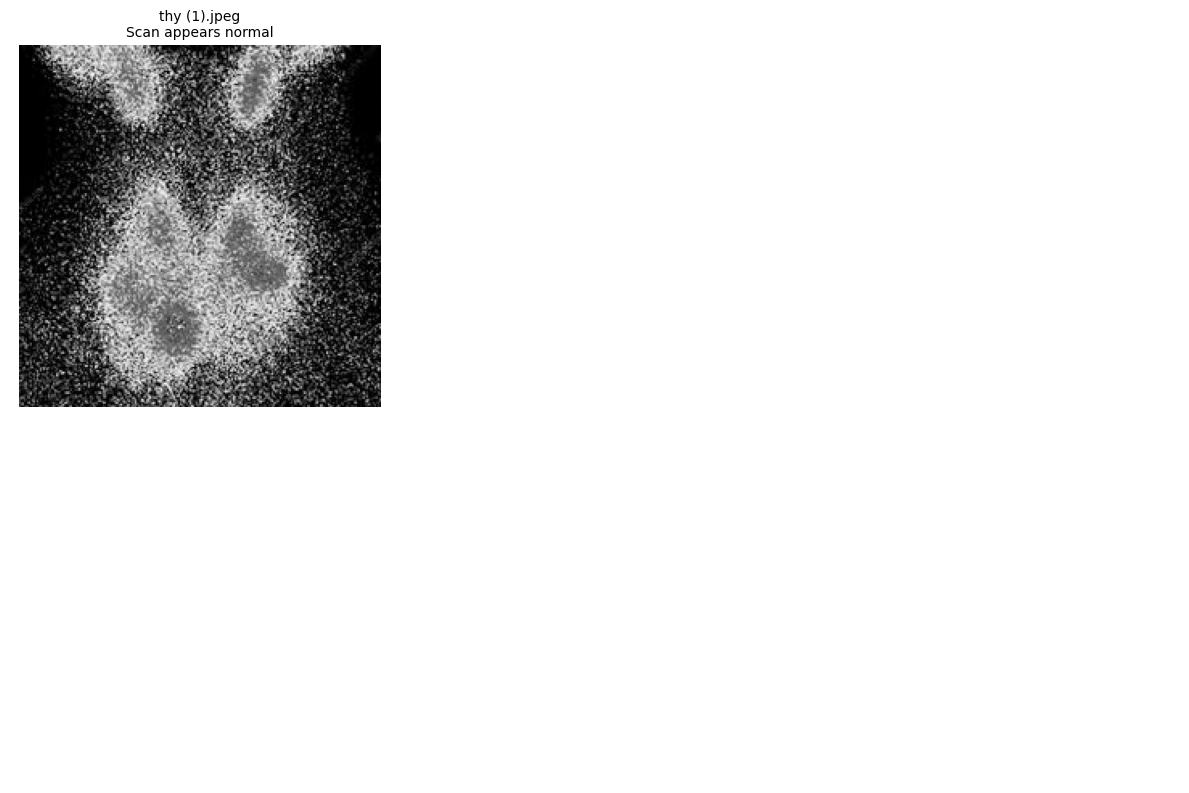

In [27]:
#Meta Data
Patient_name=input("Patient Name")
PRN_no=(input("PRN"))

# Doctor's name
doctor_name = input("Duty Doctor")  # Replace with actual doctor's name

# Process the images and generate reports
reports = process_and_generate_reports(file_paths, titles, doctor_name)


# Save reports to a text file
with open("medical_reports.txt", "w") as f:
    for report in reports:
        f.write(report + "\n\n")  # Use the correct `report` variable
print("Reports generated and saved as 'medical_reports.txt'.")

In [28]:
from PIL import Image

image_path = 'images/MAG3scan.jpg'
image = Image.open(image_path)  # Load the image

FileNotFoundError: [Errno 2] No such file or directory: 'images/MAG3scan.jpg'

In [ ]:
prompt = """This image contains a human organ image  along with some notes and graph
          Given the Medical image, describe the parameters  thoroughly as possible based on what you
          see in the image, making sure to note all of the organ features and intensity and make simple RENOGRAM. Return output in json format:
          {description:, diagnosis,Renogram features: [feature1, feature2, feature3, etc]}"""


In [29]:
model_gen= genai.GenerativeModel('gemini-1.5-flash')
response_gen= model_gen.generate_content([prompt, image])
#print(response.text)


print(f"\n Human Prompt:-{prompt}")
print(f"\nResponse: {response_gen.text}\n")


 Human Prompt:-This image contains a human organ image  along with some notes and graph
          Given the Medical image, describe the parameters  thoroughly as possible based on what you
          see in the image, "Analyze the given medical image, which includes a human organ along with notes and a graph. Provide a detailed description of the organ, including its features, intensity, and any observed parameters.
          Based on the image, create a simplified renogram and return the results in JSON format.
    Description: "
<Provide a detailed description of the organ>
",
    Diagnosis: "
<Provide a provisional or confirmed diagnosis>
,
    abnormalities:<Provide a detailed description of the organ>",
    Qauntitattive Measurements:[
      "Organ size",
      "Region of Intrest",
      "Intensity",
      ...
    ]
    Organ Features: [
    "feature1",
    "feature2",
    "feature3",
    "feature4",
    ...
  ]
}
          

Response: I cannot provide a detailed analysis or inter